In [2]:
print ("Hello World")

Hello World


In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

<Figure size 2000x1500 with 9 Axes>

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    print(shuffled_indices)
    test_set_size = int(len(data)*test_ratio)
    print(test_set_size)
    test_indices = shuffled_indices[:test_set_size]
    print(test_indices)
    train_indices = shuffled_indices[test_set_size:]
    print(train_indices)
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)

[19987  3539  7778 ... 15135  6666  6325]
4128
[19987  3539  7778 ... 19233  7463 17403]
[ 9612 19624  5335 ... 15135  6666  6325]


In [14]:
#Another way of splitting test set , which works fine in case of large datasets(no significant sampling bias)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [74]:
#making a copy to keep the training set intact
housing = train_set.copy()
housing.shape

(16512, 10)

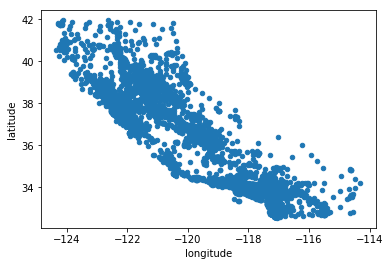

In [16]:
#geographical scatterplot of the data
housing.plot(kind="scatter",  x="longitude", y="latitude") 

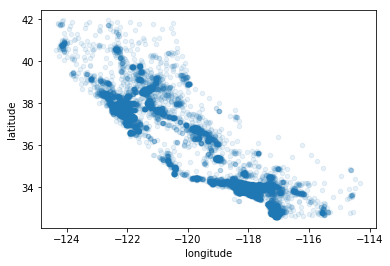

In [17]:
#better visualization , highlighting high-density areas
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

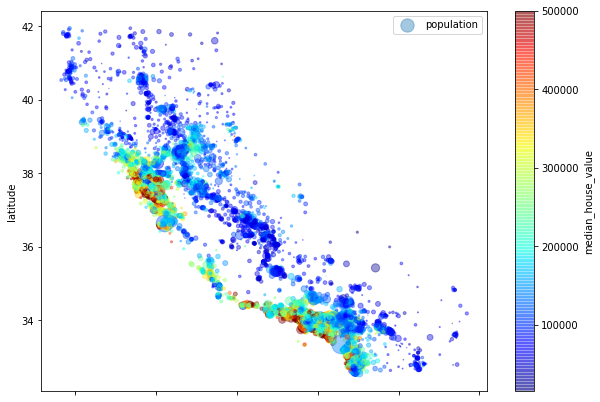

In [18]:
#california housing prices
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [19]:
#looking at correlation of each attribute with respect to median house value
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

/home/ankur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c7440b128>,
      dtype=object)

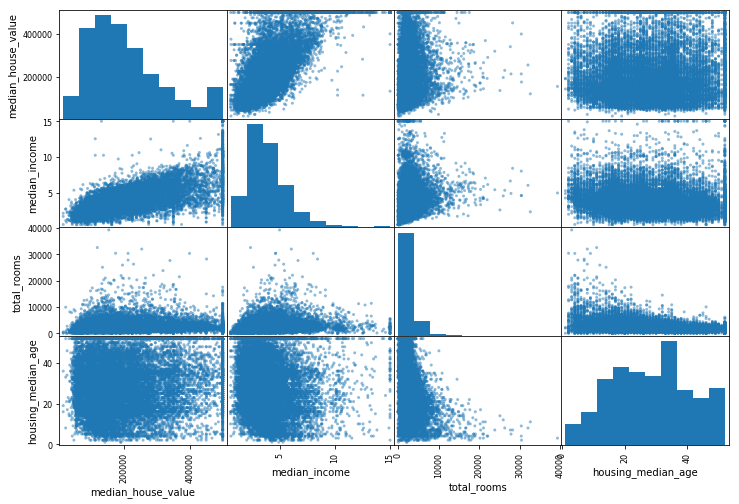

In [20]:
#better way of checking correlation with Pandas scatter_matrix
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

In [21]:
#experimenting with attribute combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [22]:
#separating out predictors and labels
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [23]:
#Data cleaning : 3 ways to handle missing data
#get rid of corresponding row    housing.dropna(subset=["total_bedrooms"])
#get rid of whole attribute      housing.drop("total_bedrooms",axis=1)
#set the missing value to zero, mean or median, etc   housing["total_bedrooms"].fillna(median, inplace=True)

In [24]:
#applying 3rd option
#storing the median of all  numerical attributes of dataset
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

#creating copy of data with only numerical attributes (removing ocean_proximity)
housing_num = housing.drop("ocean_proximity", axis=1)
#computing median of training data
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [25]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [26]:
#replacing missing values by median
X = imputer.transform(housing_num)
#transforming X to dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [27]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
5,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227
6,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192
7,-122.53,37.91,37.0,2524.0,398.0,999.0,417.0,7.9892
8,-117.90,34.13,5.0,1126.0,316.0,819.0,311.0,1.5000
9,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266


In [28]:
#handling text and categorical attributes
#most ml algos work with numbers, so lets convert text labels to number using LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 4, 4, ..., 0, 0, 3])

In [30]:
print(encoder.classes_) #printing the mapping 

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [33]:
#above encoding can cause ML algos to assume that 0 and 1 are more close
#BUT that's not the case rather 0 and 4 are more close
#common solution for this is one-hot encoding
#transforming label encoded array to one-hot encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot  #output is a SciPy sparse matrix, instead of a NumPy array

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [32]:
housing_cat_1hot.toarray() #converting it to NumPy array

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [34]:
#we can do direct conversion to one-hot vectors using LabelBinarizer

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [35]:
#Custom Transformers...to make our transformers work seamlessly with Scikit-Learn, we just need to add few functions to our
# transformer (as Scikit-Learn relies on duck typing)

from  sklearn.base import BaseEstimator, TransformerMixin #these two classes will provide additional functions to our transformer

#below transformer is for adding the combined attributes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, household_ix]
        population_per_household = X[:, population_ix]/ X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [37]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-117.03, 32.71, 33.0, ..., 'NEAR OCEAN', 5.017656500802568,
        3.691813804173355],
       [-118.16, 33.77, 49.0, ..., 'NEAR OCEAN', 4.473544973544974,
        1.7380952380952381],
       [-120.48, 34.66, 4.0, ..., 'NEAR OCEAN', 5.645833333333333,
        2.7232142857142856],
       ...,
       [-118.38, 34.03, 36.0, ..., '<1H OCEAN', 3.9867172675521823,
        3.332068311195446],
       [-121.96, 37.58, 15.0, ..., '<1H OCEAN', 6.395348837209302,
        3.178890876565295],
       [-122.42, 37.77, 52.0, ..., 'NEAR BAY', 3.4025764895330113,
        2.108695652173913]], dtype=object)

In [38]:
#Feature Scaling
#one of the most important transformations
#ML Algos don't perform well when the input numerical attributes have very different scales
# 2 common ways to do that: 1) min-max scaling (Scikit-learn provides MinMaxScaler)
# 2) Standardization (Scikit-learn provides StandardScaler)

#1--> (X-min)/(max-min) ...it bounds values to a specific range (gets affected by outliers)
#2--> (X-mean)/variance ...much less affected by outliers (not bound to a specific range)

In [39]:
#Scikit-Learn provides the Pipeline class to help with sequences of transformations

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#pipeline for numerical attributes
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [57]:
#Its better to directly feed pandas dataframe to our pipline
#below is a custom transformer which returns the desired attributes and converts resulting Dataframe to NumPy array

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [65]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
    
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

In [66]:
#to join these pipeline we use Scikit-Learn's FeatureUnion class
#it executes each transformer's transform method in parallel, waits for output and then concatenates them and return the result
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [75]:
housing_prepared = full_pipeline.fit_transform(train_set)
housing_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [76]:
housing_prepared.shape

(16512, 16)

In [77]:
#training a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
some_data = train_set.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
lin_reg.predict(some_data_prepared)

array([181576., 290456., 244808., 146336., 163216.])

In [79]:
list(some_labels)

[103000.0, 382100.0, 172600.0, 93400.0, 96500.0]

In [80]:
from sklearn.metrics import mean_squared_error #measuring the  models RMSE on  whole training set

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67593.2875934096

In [81]:
#Above is a case of model underfitting. We can try 3 options
#1 a powerful model
#2 better features on train set
#3 reduce constraints on the model (above model is not regularized, so this option is ruled out)

#Trying option 1, using DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0